# Cognizant Artificial Intelligence Project

**Briefing**

The client is *Gala Groceries* - an innovative grocery store that utilizes technology to its maximum potential. 

They have issues with supply chain and the task of this analysis is to help them understand how to stock their items better

## Part 1. EDA

 

In this part we'll conduct an exploratory data analysis in hopes of gaining valuable insights. Firstly, we'll load the data

In [1]:
import pandas as pd

sales_data = pd.read_csv("data/sample_sales_data.csv")
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [2]:
# dropping the index column
sales_data = sales_data.drop(columns=["Unnamed: 0"])
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


First and foremost, some descriptive statistics and basic dataset info

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [3]:
sales_data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [7]:
sales_data.describe(include=["O"])

,transaction_id,timestamp,product_id,category,customer_type,payment_type
count,7829,7829,7829,7829,7829,7829
unique,7829,7738,300,22,5,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,cash
freq,1,2,114,998,1601,2027


No null values, normal statistics, a lot of categories, among which are ids and timestamps (should be converted to datetime). The categories that are not ids or datetime are not highly cardinal, so they should not be difficult to deal with

Now we'll visualize each column more meticulously. Starting with numerical data.

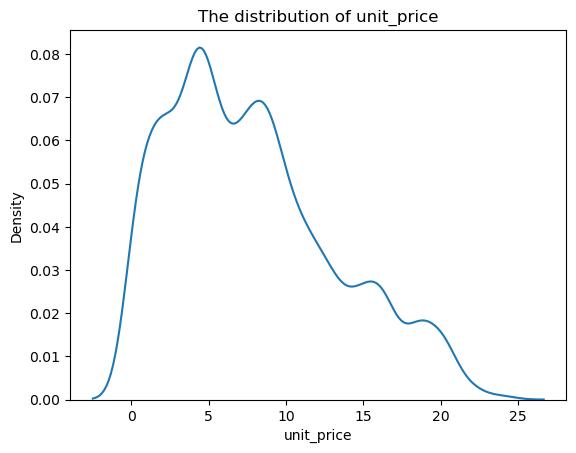

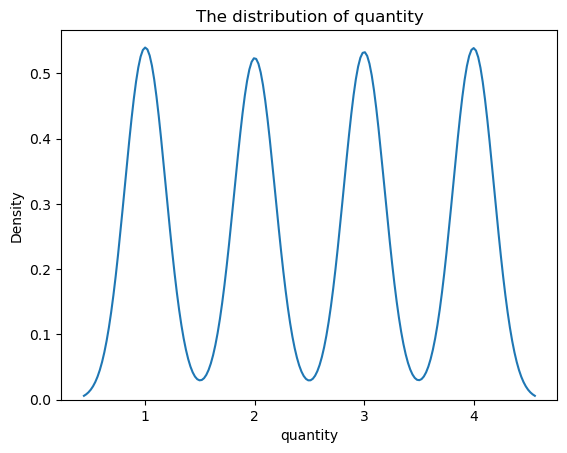

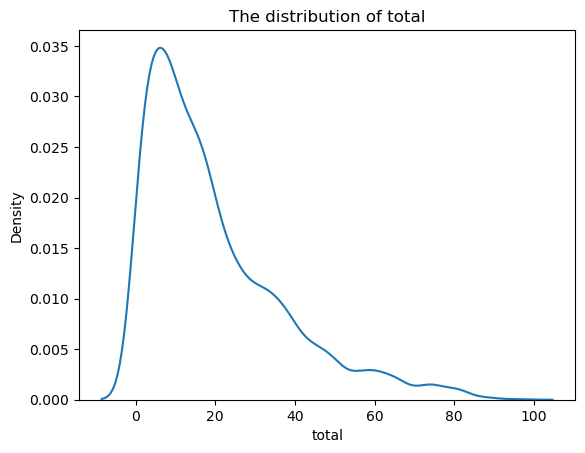

In [10]:
# distribution

import seaborn as sns
import matplotlib.pyplot as plt

column_names = ["unit_price", "quantity", "total"]
for column in column_names:
    sns.kdeplot(data=sales_data, x=column)
    plt.title(f"The distribution of {column}")
    plt.show()

Unit price is normally distributed, but is a little bit skewed with minor peaks. 

Quantity looks like multimodal distribution, where each value occurs roughly at the same frequency.

Total is similar to unit price but smoother

Let's see if they are correlated

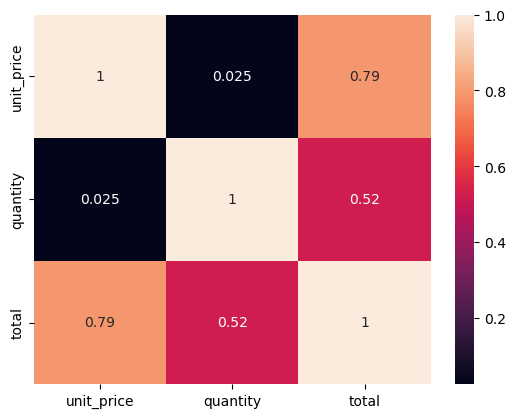

In [12]:
sns.heatmap(sales_data[["unit_price", "quantity", "total"]].corr(), annot=True)
plt.show()

Looking at the data and the plot, we can see that they are higly correlated

total = unit_price * quantity, to be exact. An obvious case of linear relationship

Now let's visualize the following categories: category (of products), customer_type and payment_type.

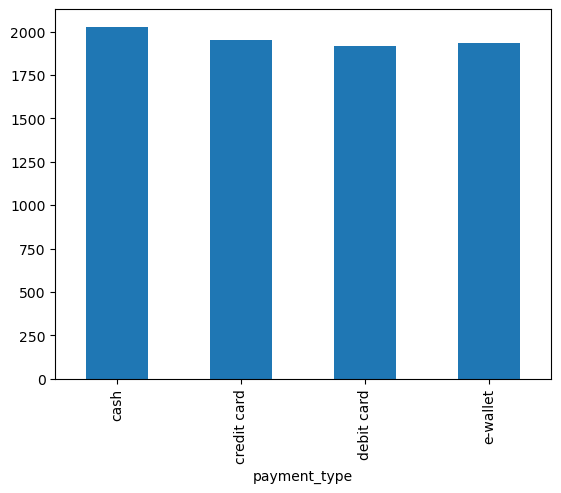

In [15]:
# payment type

payment_data = sales_data.groupby("payment_type")["transaction_id"].count()
payment_data.plot.bar()
plt.show()

Cash is more popular than everything else by a small margin, credit cards come very close, debit cards and e-wallets are approximately the same

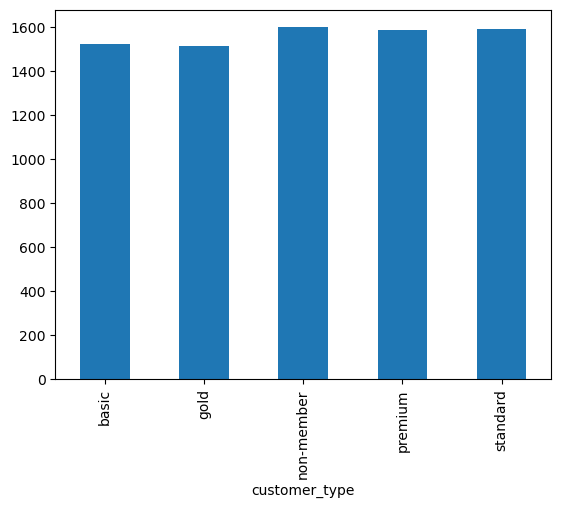

In [16]:
# customer_type

customer_data = sales_data.groupby("customer_type")["transaction_id"].count()
customer_data.plot.bar()
plt.show()

The top-3 is pretty logical:
- non-member
- standard
- premium

Basic and gold are quite the same, not sure where to put them in the hierarchy though

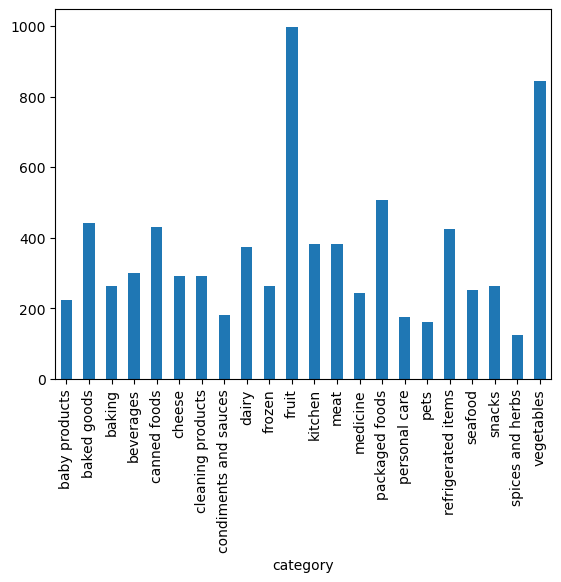

In [17]:
# goods' categories

goods_data = sales_data.groupby("category")["transaction_id"].count()
goods_data.plot.bar()
plt.show()

Fruits and vegetables are the most popular categories of products, then come packaged/refiridgerated/canned foods, then baked goods, dairy.

The least bought categories are spices and herbs, pets, personal care, condiments and sauces, and baby products

### Summary

Does the data answer the client's question? No, absolutely not. Either the question is too broad, or the data is too vague.

My recommendattions:
- get more data: both in terms of rows and columns
- the client should make his problem more specific so that it's solvable